<a href="https://colab.research.google.com/github/LMAPcoder/Machine-Learning-Lab/blob/main/Exercise_sheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab Programming Machine Learning**

## Exercise Sheet 10

### Exercise 1: Exploring Movie Recommendation Dataset

In [ ]:
import pandas as pd
import numpy as np
import zipfile as zpf
import matplotlib.pyplot as plt

In [ ]:
#Uploading the file
!wget --no-check-certificate 'https://files.grouplens.org/datasets/movielens/ml-100k.zip' -O ml-100k.zip

--2022-01-28 09:26:56--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  24.4MB/s    in 0.2s    

2022-01-28 09:26:56 (24.4 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [ ]:
#Unzipping files
zip_file = zpf.ZipFile('ml-100k.zip')
zip_file.extractall(path='/content', pwd=None)
zip_file.close()

In [ ]:
headers = ['user_id', 'item_id', 'rating', 'timestamp']
df_data = pd.read_csv('ml-100k/u.data', sep='\t', names=headers)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
df_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
print('Number of users:',df_data['user_id'].nunique())

Number of users: 943


In [ ]:
print('Number of items:',df_data['item_id'].nunique())

Number of items: 1682


In [ ]:
headers = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
df_user = pd.read_csv('ml-100k/u.user', sep='|', names=headers)

In [ ]:
df_user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
headers = ['movie_id', 'movie_title', 'release_date', 'video_release_date', \
          'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', \
          'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', \
          'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', \
          'Thriller', 'War', 'Western']
df_item = pd.read_csv('ml-100k/u.item', sep='|', names=headers, encoding="ISO-8859-1")

In [ ]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [ ]:
df_item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


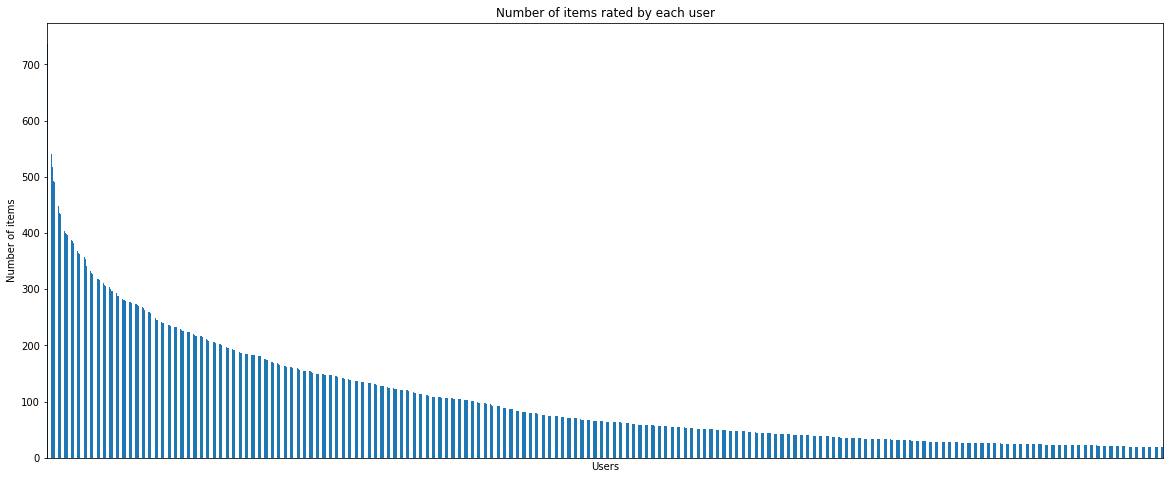

In [ ]:
user_contribution = df_data.groupby('user_id').size().sort_values(ascending=False)
ax = user_contribution.plot(kind='bar',figsize=(20,8),title='Number of items rated by each user')
# ax.get_xaxis().set_visible(False)
ax.set_xlabel('Users')
ax.set_xticks([])
ax.set_ylabel('Number of items')
plt.show()

This chart basically that there are users that have contributed more to the dataset, and therefore, their prefereces are overrepresented.

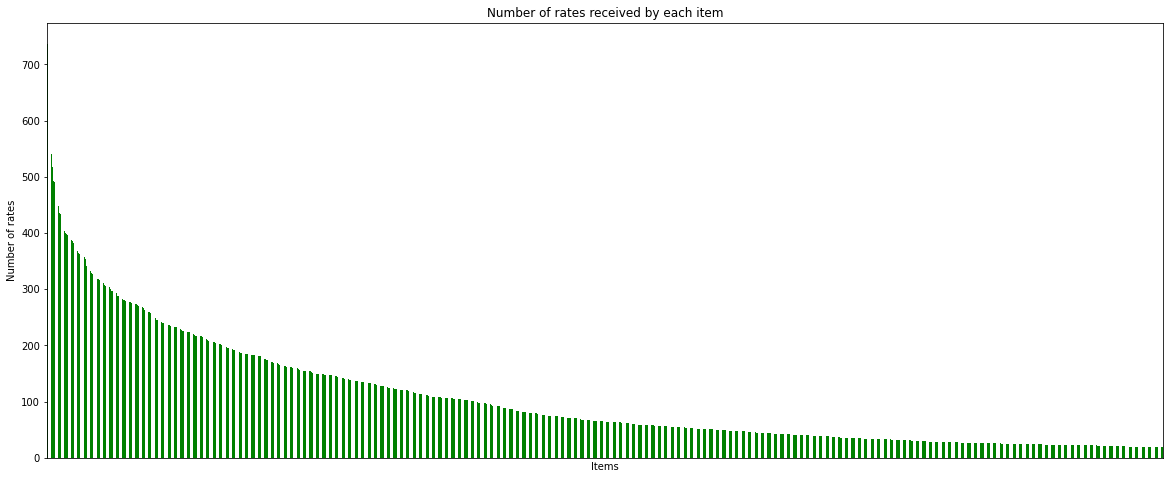

In [ ]:
item_contribution = df_data.groupby('item_id').size().sort_values(ascending=False)
ax = user_contribution.plot(kind='bar',figsize=(20,8),title='Number of rates received by each item',color='g')
# ax.get_xaxis().set_visible(False)
ax.set_xlabel('Items')
ax.set_xticks([])
ax.set_ylabel('Number of rates')
plt.show()

In [ ]:
merged_df = pd.merge(left=df_data, right=df_item, left_on='item_id',right_on='movie_id', how='left')
merged_df = pd.merge(left=merged_df, right=df_user, left_on='user_id',right_on='user_id', how='left')
merged_df[:5]

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,891717742,302,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,878887116,377,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,880606923,51,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,886397596,346,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,47,M,educator,55113


In [ ]:
merged_df.groupby('item_id').agg({'rating':'mean'})[:5]

,rating
item_id,
1,3.878319
2,3.206107
3,3.033333
4,3.550239
5,3.302326


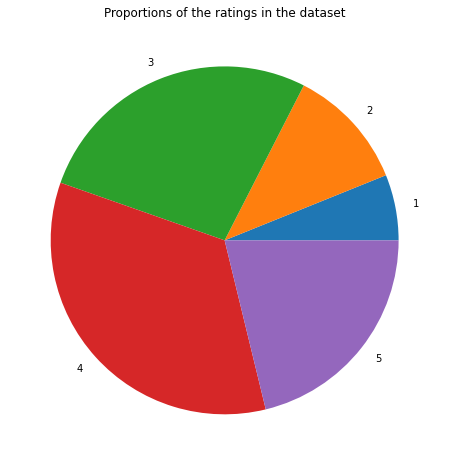

In [ ]:
ax = df_data.groupby('rating').size().plot(kind='pie',figsize=(20,8),title='Proportions of the ratings in the dataset')
ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
genres = ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', \
          'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_melted = pd.melt(merged_df,id_vars=['rating','age'],value_vars=genres,var_name='genre')
df_melted[:5]

,rating,age,genre,value
0,3,49,unknown,0
1,3,39,unknown,0
2,1,25,unknown,0
3,2,28,unknown,0
4,1,47,unknown,0


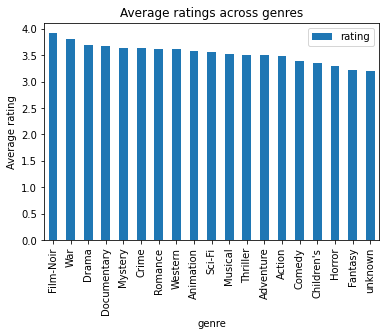

In [ ]:
df_genres_rating = df_melted[df_melted['value'] == 1].groupby('genre').agg({'rating':'mean'})
ax = df_genres_rating.sort_values(by='rating',ascending=False).plot(kind='bar',title='Average ratings across genres')
ax.set_ylabel('Average rating')
plt.show()

In [ ]:
df_genres_age = df_melted[df_melted['value'] == 1]
df_genres_age[:5]

,rating,age,genre,value
2172,5,20,unknown,1
3781,4,33,unknown,1
7245,3,24,unknown,1
8567,1,26,unknown,1
12475,3,29,unknown,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


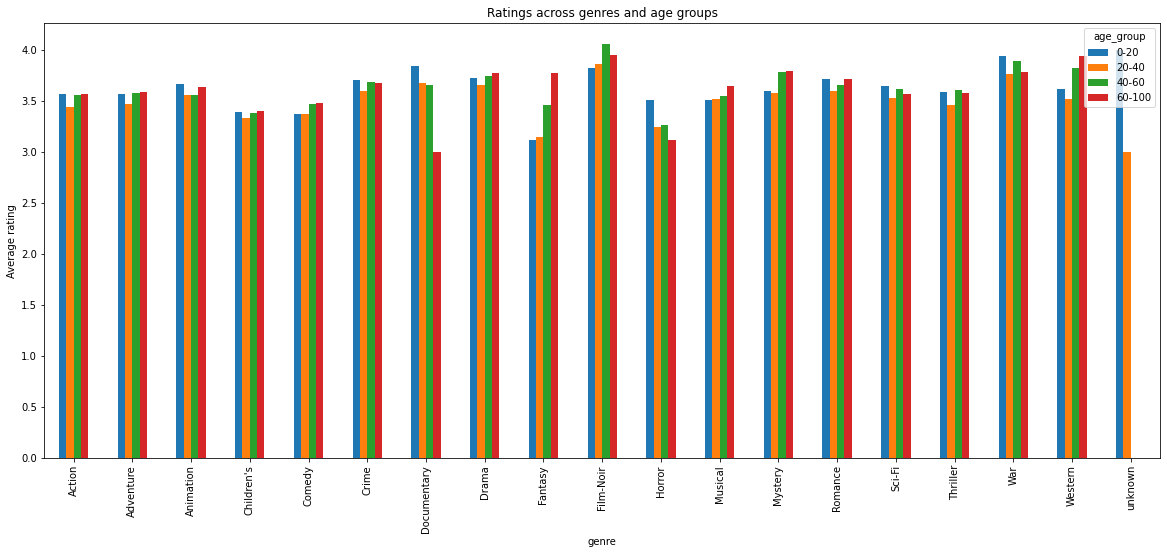

In [ ]:
df_genres_age['age_group'] = pd.cut(df_genres_age['age'].values, bins=[0,20,40,60,100],labels=["0-20","20-40","40-60",'60-100'])
ax = df_genres_age.groupby(['genre','age_group'],group_keys=False).agg({'rating':'mean'}).fillna(0).reset_index().pivot(index='genre', columns='age_group', values='rating').plot(kind='bar',figsize=(20,8))
ax.set_ylabel('Average rating')
ax.set_title('Ratings across genres and age groups')
plt.show()

### Exercise 2: Implementing basic matrix factorization (MF) technique for recommender systems

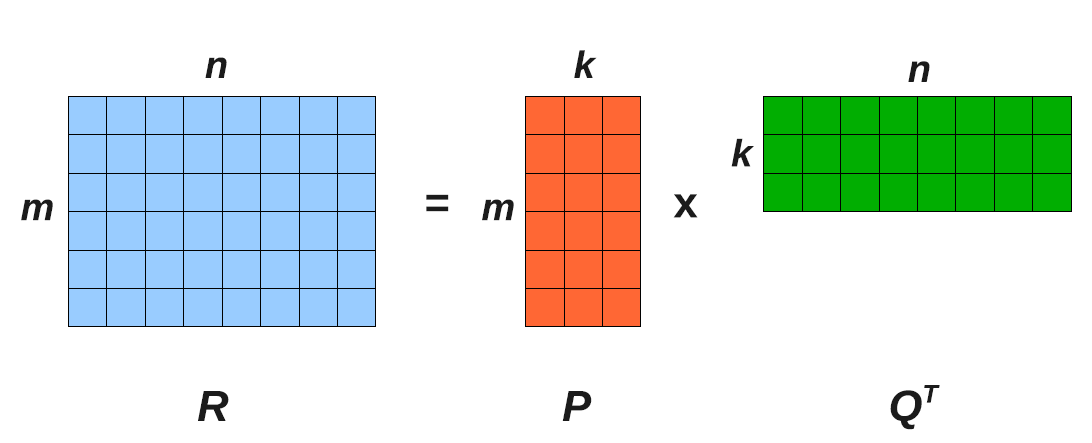

Latent factors represent categories that are present in the data. Matrix P represents the preferences or affinity of the users toward all of the latent factors. Matrix Q represents the affinity of the items toward all of the latent factors

Dataset preprocessing

In [ ]:
rating = df_data['rating']
df_data_normalized = df_data[['user_id','item_id','rating']]
normalized_rating = (rating-rating.mean())/rating.std() #normalization of the ratings
df_data_normalized['rating'] = normalized_rating
df_data_normalized[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,user_id,item_id,rating
0,196,242,-0.470705
1,186,302,-0.470705
2,22,377,-2.247419
3,244,51,-1.359062
4,166,346,-2.247419


Getting matrix R

In [ ]:
pivot_df = pd.pivot_table(df_data_normalized,index='user_id', columns='item_id', values='rating',aggfunc=np.mean)
pivot_df.iloc[:5,:5]

item_id,1,2,3,4,5
user_id,,,,,
1,1.306009,-0.470705,0.417652,-0.470705,-0.470705
2,0.417652,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,0.417652,-0.470705,NaN,NaN,NaN


In [ ]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Columns: 1682 entries, 1 to 1682
dtypes: float64(1682)
memory usage: 12.1 MB


In [ ]:
#To check there are no duplicated records in the dataset
pivot_df.duplicated().sum()

0

In [ ]:
NaNs = pivot_df.isna().sum().sum()
# nNaNs = pivot_df.notna().sum().sum()
pNaN = NaNs/pivot_df.size
print('Proportion of NaN in the dataset:',pNaN)

Proportion of NaN in the dataset: 0.9369533063577546


Dataset splitting

In [ ]:
# Input: dataframe, ratio of training data, ratio od validation data
# Output: 2-3 dataframes split accordingly
def data_partition(df,train_ratio,valid_ratio=None):
  N, M = df.shape
  df_sample = df.sample(frac=1,random_state=3116) #Return a random sample of items from an axis of object
  split1 = int(N*train_ratio)
  data_Train = df_sample[:split1]

  if valid_ratio is None:
    data_Test = df_sample[split1:]
    return data_Train,data_Test
  else:
    split2 = int(N*(train_ratio+valid_ratio))
    data_Valid = df_sample[split1:split2]
    data_Test = df_sample[split2:]
    return data_Train,data_Test,data_Valid

In [ ]:
data_Train,data_Test,data_Valid = data_partition(pivot_df,0.8,0.1)
data_Train.shape
r_df = pd.DataFrame(data=data_Train, index=pivot_df.index, columns=pivot_df.columns, dtype='float64')
r_df.iloc[:5,:5]

item_id,1,2,3,4,5
user_id,,,,,
1,1.306009,-0.470705,0.417652,-0.470705,-0.470705
2,0.417652,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,0.417652,-0.470705,NaN,NaN,NaN


Main functions

In [ ]:
def matrixFactorization(df, K, lr,lamda, epoch_max,verbose=False):
  M,N = df.shape
  np.random.seed(3116)
  P = np.random.standard_normal((M,K)) #initialization with vector drawn from normal distribution with mean 0 and standard deviation 1
  Q = np.random.standard_normal((N,K))
  r = df.to_numpy()
  nNaNs = df.notna().sum().sum()
  for epoch in range(epoch_max):
    for u in np.random.permutation(M):
      for i in np.random.permutation(N):
        if not np.isnan(r[u,i]):
          e = r[u,i] - P[u].T@Q[i]
          for k in range(K):
            P[u,k] += lr*(e*Q[i,k]-lamda*P[u,k])
            Q[i,k] += lr*(e*P[u,k]-lamda*Q[i,k])
    if verbose: print('epoch:',epoch,'RMSE on dataset:',RMSE(P,Q,df))
  return P,Q

In [ ]:
def RMSE(P,Q,df):
  P = P[df.index-1]
  R = P@Q.T
  r = df.to_numpy()
  nNaNs = df.notna().sum().sum()
  return np.sqrt(np.sum(np.nan_to_num(np.square(r-R),nan=0.0))/nNaNs)

In [ ]:
%%time
P,Q = matrixFactorization(r_df,20,0.01,1,3,verbose=True)

epoch: 0 RMSE on dataset: 1.030621721523054
epoch: 1 RMSE on dataset: 0.9927401455580714
epoch: 2 RMSE on dataset: 0.9932820370627209
CPU times: user 27.7 s, sys: 330 ms, total: 28.1 s
Wall time: 27.8 s


In [ ]:
print('Shape of matrix P:',P.shape)
print('Shape of matrix Q:',Q.shape)

Shape of matrix P: (943, 20)
Shape of matrix Q: (1682, 20)


In [ ]:
print('RMSE on validation dataset:',RMSE(P,Q,data_Valid))

RMSE on validation dataset: 1.4215413174131097


Hyperparameter tuning

In [ ]:
#Grid generator
np.random.seed(3116)
Ks = np.array([10,20,50])
lrs = np.array([0.01,0.001])
regularizations = np.array([0.1,0.5,1])
grid = np.array(np.meshgrid(Ks,lrs,regularizations),dtype='O').T.reshape(-1,3)
np.random.shuffle(grid)
grid = grid.tolist()
print('Samples of the grid:',grid[:5],sep='\n')

Samples of the grid:
[[50, 0.01, 0.1], [10, 0.01, 0.1], [50, 0.001, 1.0], [10, 0.01, 0.5], [20, 0.001, 0.1]]


In [ ]:
#Tuning function
def tuning(data_train,data_valid,grid):
  grid_rmse = list()
  for hps in grid:
    P,Q = matrixFactorization(data_train,hps[0],hps[1],hps[2],3)
    rmse = RMSE(P,Q,data_valid)
    grid_rmse.append([hps[0],hps[1],hps[2],rmse])
  return min(grid_rmse, key=lambda hp: hp[3])

In [ ]:
%%time
#Hyperpameter tunning
best_params = tuning(r_df,data_Valid,grid)
print('Best set of hyperparameters:',best_params)

Best set of hyperparameters: [10, 0.01, 1.0, 1.2439363976359226]
CPU times: user 9min 26s, sys: 3.23 s, total: 9min 29s
Wall time: 9min 39s


In [ ]:
%%time
P_best, Q_best = matrixFactorization(r_df, K=best_params[0], lr=best_params[1],lamda=best_params[2], epoch_max=3,verbose=True)

epoch: 0 RMSE on dataset: 1.0245963027570515
epoch: 1 RMSE on dataset: 1.0003259893816996
epoch: 2 RMSE on dataset: 0.9993151000293014
CPU times: user 20.4 s, sys: 374 ms, total: 20.8 s
Wall time: 20.7 s


In [ ]:
#Validation RMSE
RMSE_valid = RMSE(P_best,Q_best,data_Valid)
print('RMSE on validation dataset:',RMSE_valid)

RMSE on validation dataset: 1.2439363976359226


In [ ]:
#Test RMSE
RMSE_test = RMSE(P_best,Q_best,data_Test)
print('RMSE on test dataset:',RMSE_test)

RMSE on test dataset: 1.2097494079470745


### Exercise 3: Recommender Systems using matrix factorization sckitlearn

Using surprise

Surprise is an easy-to-use Python scikit for recommender systems.

This library was selected over others because its simplicity and great documentation.

In [ ]:
!pip install surprise

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split #to split the data
from surprise.model_selection import GridSearchCV

In [ ]:
df_data_crop = df_data[['user_id', 'item_id', 'rating']] #original dataset

In [ ]:
reader = Reader(rating_scale=(1, 5)) #Reader class is used to parse a file containing ratings
dataset = Dataset.load_from_df(df_data_crop, reader) #the df must have three columns, corresponding to the user (raw) ids, the item (raw) ids, and the ratings, in this order
#dataframe cannot have missing values

In [ ]:
#To perfom cross validation with custom grid
param_grid = {
              'n_factors':[10, 20, 50, 100], #number of factors
              'n_epochs':[3], #number of iteration
              'lr_all':[0.01, 0.001], #learning rate for all parameters
              'reg_all':[0.1, 0.5, 1], #regularization term for all parameters
              'biased':[False], #to performe basic Probabilistic Matrix Factorization
              'random_state':[3116], #determines the RNG that will be used for initialization
              'init_mean':[0], #mean of the normal distribution for factor vectors initialization
              'init_std_dev':[1] #standard deviation of the normal distribution for factor vectors initialization
              }            
gs = GridSearchCV( #computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure
    SVD, #class of the algorithm to evaluate
    param_grid, #Dictionary with algorithm parameters as keys and list of values as values
    measures=['rmse'], #performance measures to compute
    cv=3 #cross-validation iterator
    )

#this method used the whole dataset for hyperparameter tuning
gs.fit(dataset) #runs the fit() method of the algorithm for all parameter combinations
print('Best RMSE found:',gs.best_score['rmse'])
params = gs.best_params['rmse'] #get the parameters combination that gave the best RMSE results
print('Best set of hyperparameters:',params) # combination of parameters that gave the best RMSE score

1.1867830480838197
{'n_factors': 10, 'n_epochs': 3, 'lr_all': 0.01, 'reg_all': 0.1, 'biased': False, 'random_state': 3116, 'init_mean': 0, 'init_std_dev': 1}


In [ ]:
svdtuned = gs.best_estimator['rmse'] #get the algorithm that gave the best RMSE results

In [ ]:
trainset, testset = train_test_split(dataset, test_size=.1)
svdtuned.fit(trainset) #train an algorithm on a given training set
predictions = svdtuned.test(testset) #Test the algorithm on given testset. Return a list of Prediction objects that contains all the estimated ratings
accuracy.rmse(predictions)

RMSE: 1.0957


1.0956737010717283

In [ ]:
Pu = svdtuned.pu #user factors. Matrix P
print('Shape of matrix P:', Pu.shape)

Shape of matrix P: (943, 10)


In [ ]:
Qi = svdtuned.qi #item factors. Matrix Q
print('Shape of matrix Q:',Qi.shape)

Shape of matrix Q: (1666, 10)


Conclusion: the hyperparameter tuning with surprise library returned almost the same hyperparameters than my own implementation. The only difference was in the regularization coefficient and it could be caused by the cross-validation method. For the same reason, the RMSE on test data is not the same but similar.